# Dropout  

Importando el paquete $pytorch$ y llamandolo como `pt`:  

In [1]:
import torch as pt

## 1.Creando la función que cree los datos iniciales:

Creando la función que se aproxime a:  $$\large f(x)= -3.5x +2$$ 

In [2]:
from torch.utils.data import Dataset

In [3]:
class Data(Dataset):
    def __init__(self):
        self.x=pt.arange(-3,3,0.1).view(-1,1)
        self.y=-3.5*self.x + 2+ 0.45*pt.randn(self.x.size())
        self.len= self.x.shape[0]
                
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.len

Guardando los datos en la variable `dataset`:

In [4]:
dataset=Data()

## 2.Creando el programa  del modelo:

In [5]:
import torch.nn as nn

Definiendo la **función objetivo**: $$ \Large g(y^*,y)= \frac{1}{N}\sum_{n=1}^N (y^*-y)^2 $$

In [8]:
def criterion(yhat,y):
    return pt.mean((yhat-y)**2)

**Otra alternativa:**<br> `criterion=nn.MSELoss()`

Particionando el dataset con el tamaño de una fila:

In [9]:
from torch.utils.data import DataLoader

In [10]:
trainloader= DataLoader(dataset=dataset,batch_size=1)

Ejecutando las iteraciones:<br> 
### Sin Dropout:

In [41]:
model=nn.Sequential(nn.Linear(1,10),nn.ReLU(),nn.Linear(10,12),nn.ReLU(),nn.Linear(12,1))
optimizer=pt.optim.SGD(model.parameters(),lr=0.01)
LOSS=[]
for epoch in range(100):
    for x,y in trainloader:
        yhat= model(x)
        loss= criterion(yhat,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    LOSS.append(float(loss))   

### Con Dropout:

In [40]:
modelD=nn.Sequential(nn.Linear(1,10),nn.Dropout(0.5),nn.ReLU(),nn.Linear(10,12),nn.Dropout(0.5),nn.ReLU(),nn.Linear(12,1))
optimizer=pt.optim.SGD(model.parameters(),lr=0.01)
LOSSD=[]
for epoch in range(100):
    for x,y in trainloader:
        yhat= modelD(x)
        loss= criterion(yhat,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    LOSSD.append(float(loss))  

Comparando la diferencia de $loss$:

In [15]:
import matplotlib.pyplot as plt

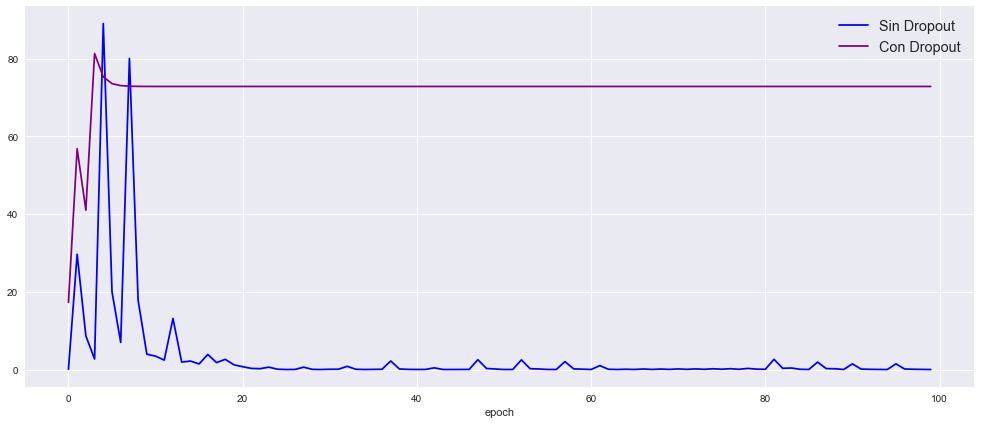

In [39]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize= (17,7))
ax.plot(LOSS, color= 'blue', label='Sin Dropout')
ax.plot(LOSSD,color= 'purple',label='Con Dropout')
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.xlabel('epoch')
#legend.get_frame().set_facecolor('cyan')
plt.show()

Por si acaso, comandos adicionales:
```Python
model.eval()
yhat=model(x)```

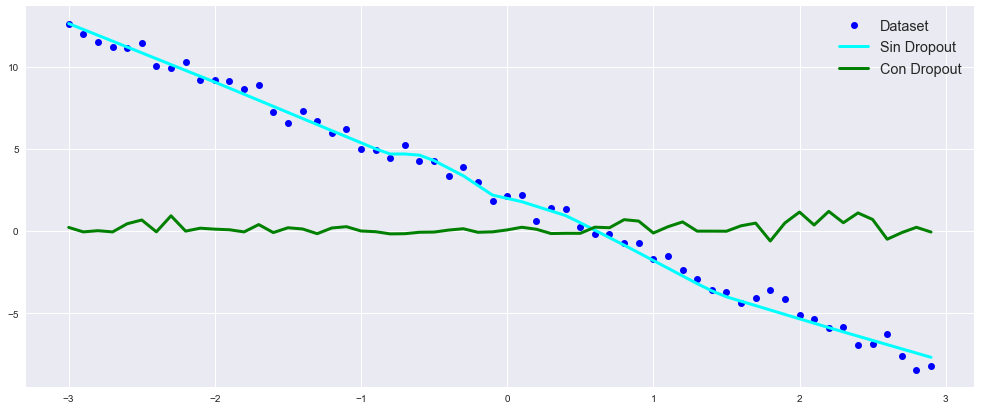

In [44]:
fig, ax = plt.subplots(figsize= (17,7))
ax.plot(dataset.x.numpy(),dataset.y.numpy(),'bo', color= 'blue', label='Dataset')
ax.plot(dataset.x.numpy(),model(dataset.x).detach().numpy(),linewidth=3,color= 'cyan',label='Sin Dropout')
ax.plot(dataset.x.numpy(),modelD(dataset.x).detach().numpy(),linewidth=3,color= 'green',label='Con Dropout')
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
#legend.get_frame().set_facecolor('cyan')
plt.show()

Aparentemente no hace falta hacer más ajustes de los modelos ya aprendidos.